C:\Users\bruno\AppData\Local\Temp\ipykernel_14600\1086027095.py:24: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  linear_dependency = df.corr()
c:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Linear Dependency and Correlation Coefficient:
              kWh produced    On/Off  location  type  ID   STN
kWh produced      1.000000  0.049376       NaN   NaN NaN   NaN
On/Off            0.049376  1.000000       NaN   NaN NaN   NaN
location               NaN       NaN       NaN   NaN NaN   NaN
type                   NaN       NaN       NaN   NaN NaN   NaN
ID                     NaN       NaN       NaN   NaN NaN   NaN
 STN                   NaN       NaN       NaN   NaN NaN   NaN

Logistic Regression Score:
0.013689253935660506

Linear Regression Score:
0.013797719298311417


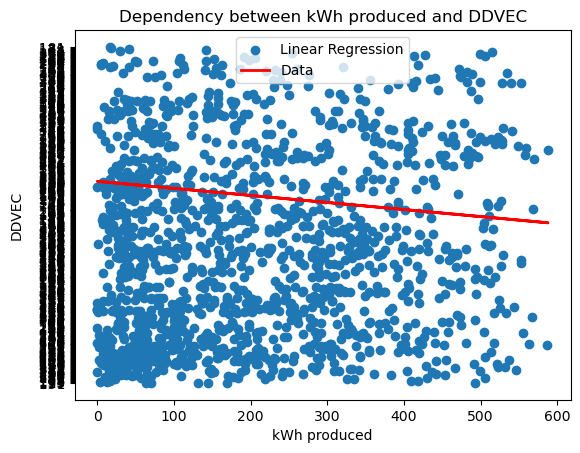

In [32]:
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

#load data
WeatherData_269 = pd.read_csv("DATA/WeatherData_269.txt", sep=",")
SolarData = pd.read_csv("DATA/SolarData.txt", sep=",")
#WindData = pd.read_csv("DATA/WindData.txt", sep=",")
#print(df.location)
# lets try with dependency between weather and solar on location 269
#print(SolarData['location'].unique())
filtered_df = SolarData[SolarData['location'] == 269]
filtered_df = filtered_df[filtered_df['type'] == 1]
filtered_df = filtered_df[filtered_df['ID'] == 1]

merged_df = pd.merge(filtered_df, WeatherData_269, on='Date')

df = merged_df


# Calculate correlation coefficients
linear_dependency = df.corr()

# Logistic regression
logistic_regression = LogisticRegression()

# Assuming 'column1' and 'column2' are the columns you want to analyze
X = df['kWh produced']
y = df['DDVEC']
logistic_regression.fit(X.values.reshape(-1, 1), y)
logistic_regression_score = logistic_regression.score(
    X.values.reshape(-1, 1), y)

# Linear regression
linear_regression = LinearRegression()
linear_regression.fit(X.values.reshape(-1, 1), y)
linear_regression_score = linear_regression.score(X.values.reshape(-1, 1), y)
y_pred = linear_regression.predict(X.values.reshape(-1, 1))

# Print the results
print("Linear Dependency and Correlation Coefficient:")
print(linear_dependency)

print("\nLogistic Regression Score:")
print(logistic_regression_score)

print("\nLinear Regression Score:")
print(linear_regression_score)

# Plotting the dependency
plt.scatter(X, y)
plt.plot(X, y_pred, color='red', linewidth=2)
plt.xlabel('kWh produced')
plt.ylabel('DDVEC')
plt.title('Dependency between kWh produced and DDVEC')
plt.legend(['Linear Regression', 'Data'])
plt.show()
